<a href="https://colab.research.google.com/github/rafarodriguero/DioMachineLearning/blob/main/DesafioTransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os

import random
import tensorflow as tf
import zipfile

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from shutil import copyfile

In [5]:
def remove_files (SOURCE):
  print('DELETANDO OS ARQUIVOS EM '+SOURCE)
  if os.path.exists(SOURCE):
    if len(os.listdir(SOURCE)) > 0:
      for filename in os.listdir(SOURCE):
        file = SOURCE +'/'+ filename
        os.remove(file)
      else:
        print('Não existem arquivos no diretório: '+SOURCE)
    os.rmdir(SOURCE)
  else:
    print('Diretório :'+SOURCE+' não existe')

remove_files('/tmp/cats-v-dogs/testing/cats')
remove_files('/tmp/cats-v-dogs/testing/dogs')
remove_files('/tmp/cats-v-dogs/training/cats')
remove_files('/tmp/cats-v-dogs/training/dogs')
remove_files('/tmp/cats-v-dogs/training')
remove_files('/tmp/cats-v-dogs/testing')
remove_files('/tmp/cats-v-dogs')

remove_files('/tmp/PetImages/Cat')
remove_files('/tmp/PetImages/Dog')
remove_files('/tmp/PetImages')

try:
  os.mkdir('/tmp/cats-v-dogs')
  os.mkdir('/tmp/cats-v-dogs/training')
  os.mkdir('/tmp/cats-v-dogs/testing')
  os.mkdir('/tmp/cats-v-dogs/training/cats')
  os.mkdir('/tmp/cats-v-dogs/training/dogs')
  os.mkdir('/tmp/cats-v-dogs/testing/cats')
  os.mkdir('/tmp/cats-v-dogs/testing/dogs')
except OSError:
  pass

DELETANDO OS ARQUIVOS EM /tmp/cats-v-dogs/testing/cats
Diretório :/tmp/cats-v-dogs/testing/cats não existe
DELETANDO OS ARQUIVOS EM /tmp/cats-v-dogs/testing/dogs
Diretório :/tmp/cats-v-dogs/testing/dogs não existe
DELETANDO OS ARQUIVOS EM /tmp/cats-v-dogs/training/cats
Diretório :/tmp/cats-v-dogs/training/cats não existe
DELETANDO OS ARQUIVOS EM /tmp/cats-v-dogs/training/dogs
Diretório :/tmp/cats-v-dogs/training/dogs não existe
DELETANDO OS ARQUIVOS EM /tmp/cats-v-dogs/training
Diretório :/tmp/cats-v-dogs/training não existe
DELETANDO OS ARQUIVOS EM /tmp/cats-v-dogs/testing
Diretório :/tmp/cats-v-dogs/testing não existe
DELETANDO OS ARQUIVOS EM /tmp/cats-v-dogs
Diretório :/tmp/cats-v-dogs não existe
DELETANDO OS ARQUIVOS EM /tmp/PetImages/Cat
Diretório :/tmp/PetImages/Cat não existe
DELETANDO OS ARQUIVOS EM /tmp/PetImages/Dog
Diretório :/tmp/PetImages/Dog não existe
DELETANDO OS ARQUIVOS EM /tmp/PetImages
Diretório :/tmp/PetImages não existe


In [6]:
!echo "download do arquivo zip de base de fotos"

!curl -L -o /tmp/cats-and-dogs.zip --progress-bar https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

download do arquivo zip de base de fotos
######################################################################## 100.0%


In [7]:
print(len(os.listdir('/tmp/PetImages/Cat')))
print(len(os.listdir('/tmp/PetImages/Dog')))

12501
12501


In [8]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
  files = []
  for filename in os.listdir(SOURCE):
    file = SOURCE + filename
    if os.path.getsize(file) > 0:
      files.append(filename)
    else:
      print(filename + "Arquivo Ignorado, tamanho zero")

  training_length = int(len(files) * SPLIT_SIZE)
  testing_length = int(len(files) - training_length)
  shuffled_set = random.sample(files, len(files))
  training_set = shuffled_set[0:training_length]
  testing_set = shuffled_set[-testing_length:]

  
  for filename in training_set:
    this_file = SOURCE + filename
    destination = TRAINING + filename
    copyfile(this_file, destination)

  for filename2 in testing_set:
    this_file = SOURCE + filename2
    destination = TESTING + filename2
    copyfile(this_file, destination)


CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

split_size = .9
split_data (CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data (DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)


666.jpgArquivo Ignorado, tamanho zero
11702.jpgArquivo Ignorado, tamanho zero


In [9]:
print(len(os.listdir('/tmp/cats-v-dogs/training/cats')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs')))

11250
11250
1250
1250


In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()])

In [11]:
TRAINING_DIR = '/tmp/cats-v-dogs/training/'
train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=250,
                                                    class_mode='binary',
                                                    target_size=(150,150))

VALIDATION_DIR = '/tmp/cats-v-dogs/testing/'
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = train_datagen.flow_from_directory(VALIDATION_DIR,
                                                    batch_size=250,
                                                    class_mode='binary',
                                                    target_size=(150,150))

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [12]:
history = model.fit(train_generator, epochs=15, steps_per_epoch=30,
                    validation_data=validation_generator, validation_steps=6)

Epoch 1/15
25/30 [========================>.....] - ETA: 3s - loss: 0.7901 - binary_accuracy: 0.5253 - false_negatives: 1179.0000

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

30/30 [==============================] - 41s 887ms/step - loss: 0.7737 - binary_accuracy: 0.5273 - false_negatives: 1603.0000 - val_loss: 0.6796 - val_binary_accuracy: 0.5720 - val_false_negatives: 568.0000
Epoch 2/15
30/30 [==============================] - 27s 891ms/step - loss: 0.6640 - binary_accuracy: 0.5816 - false_negatives: 973.0000 - val_loss: 0.6347 - val_binary_accuracy: 0.6607 - val_false_negatives: 256.0000
Epoch 3/15
30/30 [==============================] - 27s 886ms/step - loss: 0.6183 - binary_accuracy: 0.6611 - false_negatives: 1276.0000 - val_loss: 0.6252 - val_binary_accuracy: 0.6500 - val_false_negatives: 277.0000
Epoch 4/15
30/30 [==============================] - 27s 891ms/step - loss: 0.5840 - binary_accuracy: 0.6861 - false_negatives: 1204.0000 - val_loss: 0.5847 - val_binary_accuracy: 0.6853 - val_false_negatives: 329.0000
Epoch 5/15
30/30 [==============================] - 26s 882ms/step - loss: 0.5686 - binary_accuracy: 0.7003 - false_negatives: 1156.0000 - v

In [13]:
print(history.history)

{'loss': [0.7736954689025879, 0.6639530062675476, 0.6182724237442017, 0.5840485095977783, 0.5686204433441162, 0.530655562877655, 0.4841269850730896, 0.48457327485084534, 0.45207709074020386, 0.44856780767440796, 0.4105571508407593, 0.4077061116695404, 0.38789114356040955, 0.37727153301239014, 0.3555617332458496], 'binary_accuracy': [0.5273333191871643, 0.5816217660903931, 0.6611096262931824, 0.6861333250999451, 0.7002666592597961, 0.7336000204086304, 0.7626033425331116, 0.766204297542572, 0.7842666506767273, 0.7870098948478699, 0.8150173425674438, 0.8117333054542542, 0.8233333230018616, 0.8323553204536438, 0.8413333296775818], 'false_negatives': [1603.0, 973.0, 1276.0, 1204.0, 1156.0, 1085.0, 974.0, 934.0, 845.0, 851.0, 710.0, 743.0, 656.0, 656.0, 581.0], 'val_loss': [0.6795597672462463, 0.6346961259841919, 0.6252117156982422, 0.5846524238586426, 0.592465877532959, 0.5405184030532837, 0.5303359031677246, 0.49834614992141724, 0.5234827995300293, 0.4762074053287506, 0.5117202997207642, 0

<Figure size 432x288 with 0 Axes>

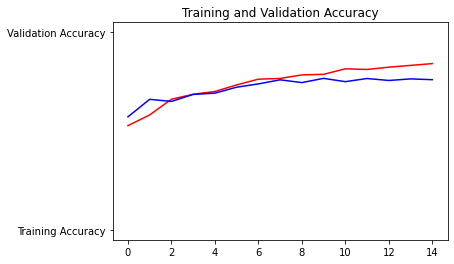

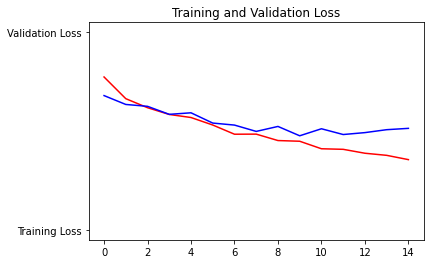

<Figure size 432x288 with 0 Axes>

In [14]:
%matplotlib inline

acc = history.history['binary_accuracy']
val_acc=history.history['val_binary_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r', 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.figure()


plt.plot(epochs, loss, 'r', 'Training Loss')
plt.plot(epochs, val_loss, 'b', 'Validation Loss')
plt.title('Training and Validation Loss')
plt.figure()
